<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Feature Selection?
Feature selection is the process of selecting the most relevant variables (features) from a dataset to improve model performance, reduce overfitting, and decrease training time.

#What are Embedded Methods?

Embedded methods perform feature selection as part of the model training process itself. These methods are integrated into learning algorithms, combining the benefits of both filter and wrapper methods.

They automatically penalize or reduce the importance of less useful features during model training using techniques like regularization or decision criteria.



#1. Lasso Regression (L1 Regularization)

Adds a penalty term: α * |coefficients|

Shrinks some coefficients exactly to zero

Features with zero coefficients can be removed

Good for sparse models and feature selection



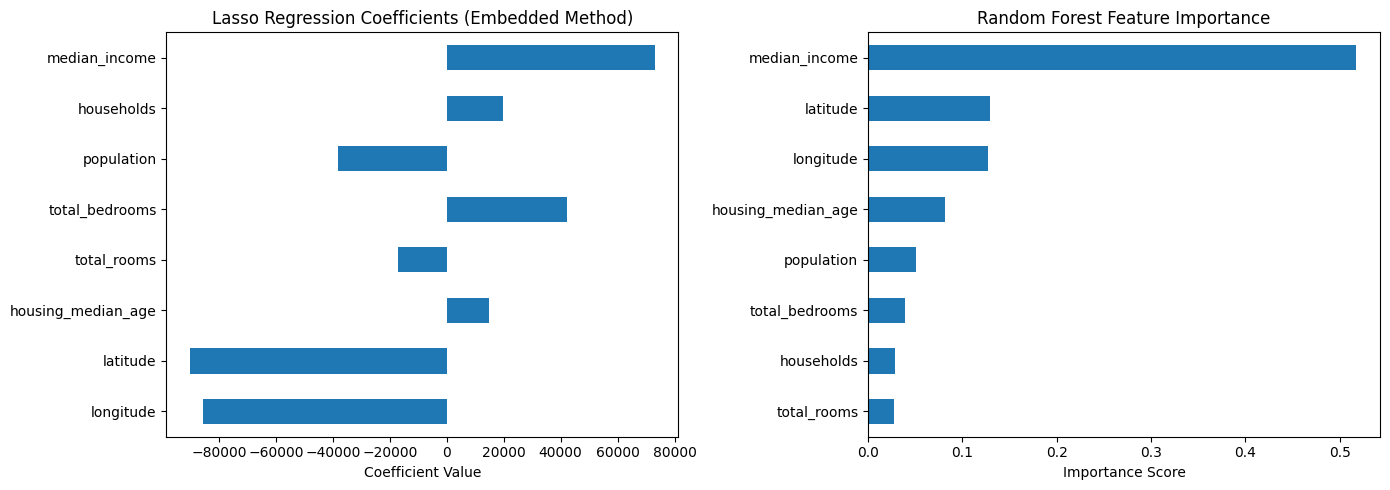

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Normalize features for Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Lasso Regression (L1)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# 2. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)

# Visualization
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
lasso_coef.plot(kind='barh', title='Lasso Regression Coefficients (Embedded Method)')
plt.xlabel('Coefficient Value')

plt.subplot(1, 2, 2)
rf_importance.sort_values().plot(kind='barh', title='Random Forest Feature Importance')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()


In [ ]:
lasso_importance = pd.Series(lasso.coef_, index=X.columns)
print(" Lasso Feature Importances:\n")
print(lasso_importance.sort_values(ascending=False))


 Lasso Feature Importances:

median_income         73190.473631
total_bedrooms        42172.280173
households            19733.476303
housing_median_age    14917.247263
total_rooms          -17289.617508
population           -38335.677420
longitude            -85779.054234
latitude             -90288.858857
dtype: float64


#2. Ridge Regression (L2 Regularization)
Adds penalty: α * (coefficients²)

Shrinks coefficients but does not set them to zero

Helps with multicollinearity but not ideal for feature elimination

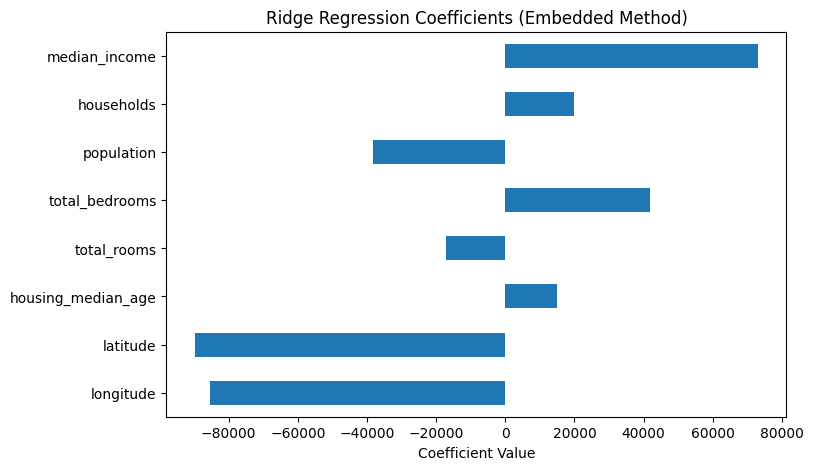

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
ridge_coef = pd.Series(ridge.coef_, index=X.columns)

# Plot Ridge Coefficients
plt.figure(figsize=(8, 5))
ridge_coef.plot(kind='barh', title='Ridge Regression Coefficients (Embedded Method)')
plt.xlabel('Coefficient Value')
plt.show()


In [ ]:
ridge_importance = pd.Series(ridge.coef_, index=X.columns)
print(" Ridge Feature Importances:\n")
print(ridge_importance.sort_values(ascending=False))


 Ridge Feature Importances:

median_income         73172.171210
total_bedrooms        41777.094108
households            19952.580250
housing_median_age    14956.239465
total_rooms          -17127.937425
population           -38302.161429
longitude            -85354.457079
latitude             -89868.253252
dtype: float64


#3. Elastic Net (L1 + L2)
Combines Lasso and Ridge penalties

Useful when:

Many features are correlated

Lasso is too aggressive or Ridge is too soft

Provides balanced feature selection

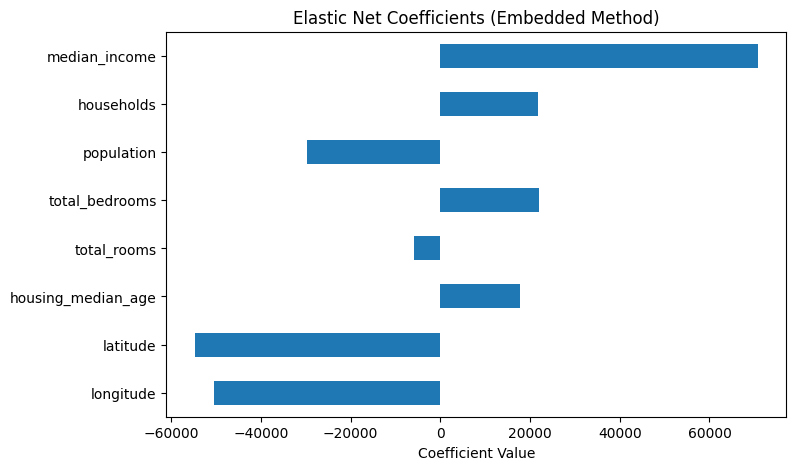

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 means equal L1 and L2
elastic.fit(X_scaled, y)
elastic_coef = pd.Series(elastic.coef_, index=X.columns)

# Plot Elastic Net Coefficients
plt.figure(figsize=(8, 5))
elastic_coef.plot(kind='barh', title='Elastic Net Coefficients (Embedded Method)')
plt.xlabel('Coefficient Value')
plt.show()


In [ ]:
elastic_importance = pd.Series(elastic.coef_, index=X.columns)
print(" Elastic Net Feature Importances:\n")
print(elastic_importance.sort_values(ascending=False))



 Elastic Net Feature Importances:

median_income         70874.457766
total_bedrooms        21959.959733
households            21801.565300
housing_median_age    17708.393372
total_rooms           -5908.042261
population           -29797.049614
longitude            -50423.529885
latitude             -54730.692452
dtype: float64


#4. Tree-Based Models (e.g., Decision Tree, Random Forest, XGBoost)
Measure feature importance using:

Information Gain (Entropy or Gini)

Reduction in variance

Provide scores to each feature based on how useful they are in splitting the data

Can be visualized using importance plots

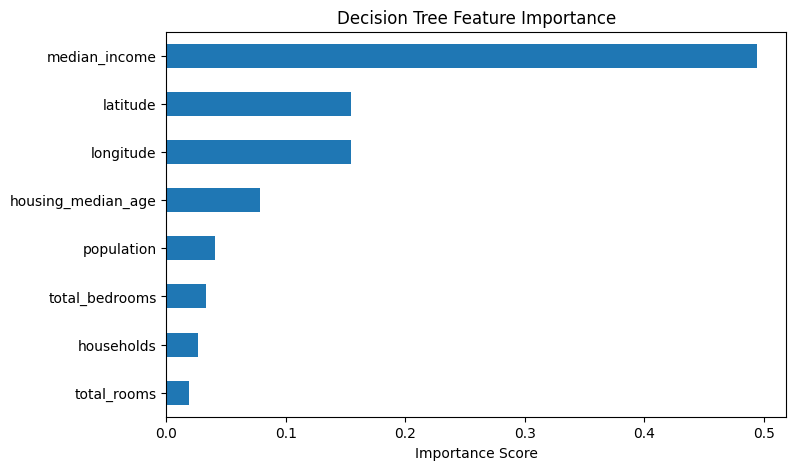

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)
tree_importance = pd.Series(tree.feature_importances_, index=X.columns)

# Plot Feature Importances
plt.figure(figsize=(8, 5))
tree_importance.sort_values().plot(kind='barh', title='Decision Tree Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [ ]:
tree_importance = pd.Series(tree.feature_importances_, index=X.columns)
print(" Decision Tree Feature Importances:\n")
print(tree_importance.sort_values(ascending=False))


 Decision Tree Feature Importances:

median_income         0.494374
latitude              0.154524
longitude             0.154384
housing_median_age    0.078315
population            0.040280
total_bedrooms        0.032784
households            0.026399
total_rooms           0.018938
dtype: float64
